In [7]:
import numpy as np

import paths

from ged.GED import ged
from utils.graphfiles import loadDataset
from ged.costfunctions import RiesenCostFunction, BasicCostFunction
from ged.bipartiteGED import computeBipartiteCostMatrix, getOptimalMapping

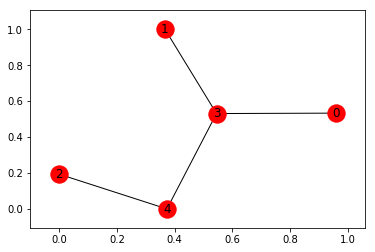

[0, 1, 4]


In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot  as plt
dataset, y = loadDataset("/home/bgauzere/work/Datasets/Acyclic/dataset_bps.ds")
nx.draw_networkx(dataset[12])
plt.show()
print(list(dataset[12][3]))

In [10]:
cf = BasicCostFunction(1,3,1,3)
N=len(dataset)
N=10
ged_distances = np.zeros((N,N))
for i in range(0,N):
    for j in range(i,N):
          ged_distances[j,i] = ged_distances[i,j] = ged(dataset[i],dataset[j],cf=cf, method='Riesen')[0]
        


In [12]:
G1=dataset[12]
G2=dataset[12]

print(ged(G1,G2))
print(ged(G1,G2,method='Basic'))
print(ged(G1,G2,method='Riesen'))


(0, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
(0, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
(0, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


In [13]:
l = nx.shortest_path(G1)
print(l)

distances = np.zeros((G1.number_of_nodes(),G1.number_of_nodes()))
for i in l.keys():
    for j in l[i].keys():
        distances[i,j] = len(l[i][j])-1

print(distances)


{0: {0: [0], 3: [0, 3], 1: [0, 3, 1], 4: [0, 3, 4], 2: [0, 3, 4, 2]}, 1: {1: [1], 3: [1, 3], 0: [1, 3, 0], 4: [1, 3, 4], 2: [1, 3, 4, 2]}, 2: {2: [2], 4: [2, 4], 3: [2, 4, 3], 0: [2, 4, 3, 0], 1: [2, 4, 3, 1]}, 3: {3: [3], 0: [3, 0], 1: [3, 1], 4: [3, 4], 2: [3, 4, 2]}, 4: {4: [4], 2: [4, 2], 3: [4, 3], 0: [4, 3, 0], 1: [4, 3, 1]}}
[[ 0.  2.  3.  1.  2.]
 [ 2.  0.  3.  1.  2.]
 [ 3.  3.  0.  2.  1.]
 [ 1.  1.  2.  0.  1.]
 [ 2.  2.  1.  1.  0.]]
